Data cleaning using the code from RevenueBudgetAnalysis.ipynb

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
dset = pd.read_csv("data/fy24-adopted-revenue-budget.csv")
dset = dset.dropna(axis=1)
null_res = pd.isnull(dset)
dset_non_dup = dset.drop_duplicates()
money_cols = dset.iloc[:,-4:].columns
dset[money_cols] = dset[money_cols].replace(regex=',', value='')
dset[money_cols] = dset[money_cols].apply(pd.to_numeric)

dset

,Revenue Category,Account,Cabinet,Department,FY21 Actual,FY22 Actual,FY23 Appropriation,FY24 Adopted
0,Property Tax Levy,Real Estate Taxes,Finance,Assessing Department,2490082613,2630469593,2784133324,2913736657
1,Property Tax Levy,Personal Property Tax,Finance,Assessing Department,189939113,196499737,209010762,214236031
2,Property Tax Levy,Property Tax Overlay,Finance,Assessing Department,-3735387,-33174590,-29845007,-30000000
3,Excises,MV Excise - Current Year,Finance,Assessing Department,36012943,36227381,34000000,34000000
4,Excises,MV Excise - Prior Year,Finance,Assessing Department,15202795,21692077,17500000,18000000
...,...,...,...,...,...,...,...,...
194,Available Funds,Approp. Cemetery Trust Fund,"Environment, Energy & Open Space",Parks & Recreation Department,0,0,950000,950000
195,Available Funds,Approp. Parking Meters,Streets,Transportation Department,20000000,0,30000000,30000000
196,Non-Recurring Revenue,American Rescue Plan,Finance,Auditing Department,0,55000000,40000000,0
197,Non-Recurring Revenue,Approp. Fund Balance,Finance,Auditing Department,40000000,0,40000000,40000000


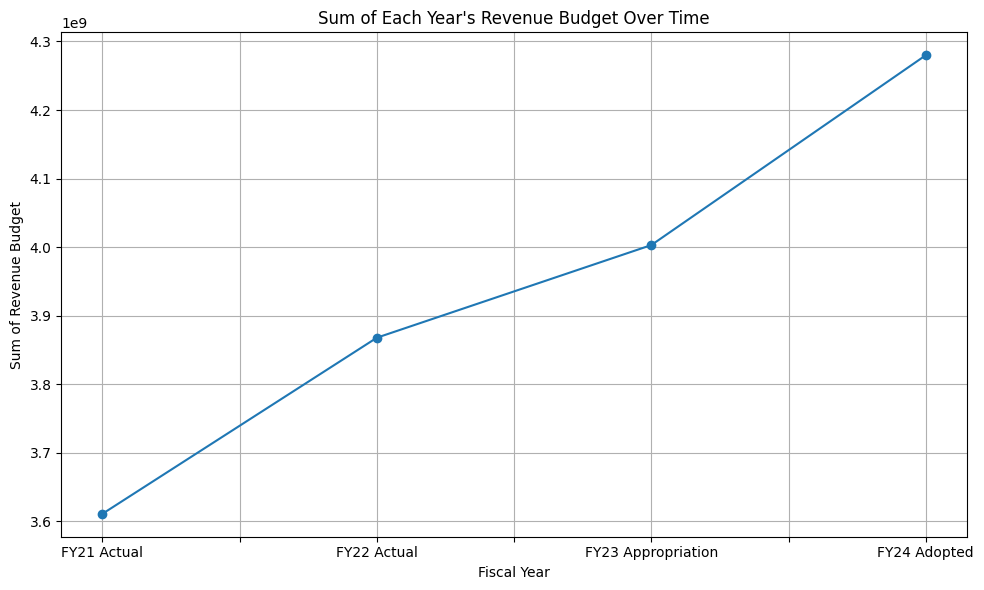

In [27]:
# Summing up the values for each fiscal year
sums = dset[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']].sum()

# Plotting the data
plt.figure(figsize=(10,6))
sums.plot(kind='line', marker='o')
plt.title('Sum of Each Year\'s Revenue Budget Over Time')
plt.ylabel('Sum of Revenue Budget')
plt.xlabel('Fiscal Year')
plt.grid(True)
plt.tight_layout()
plt.show()


The chart above showcases a consistent upward trend in the revenue budget across four fiscal years, indicating positive financial growth and effective budget management.

The code below indicates that graphing based on the Revenue Category and Cabinet columns would be suitable, as these columns contain a limited number of unique values. Additionally, the data suggests that a grouped bar chart would effectively depict the distribution of the revenue budget across these categories.

In [28]:
print('Revenue Category:', dset['Revenue Category'].nunique())
print('Account:', dset['Account'].nunique())
print('Cabinet:', dset['Cabinet'].nunique())
print('Department:', dset['Department'].nunique())

Revenue Category: 12
Account: 106
Cabinet: 15
Department: 42


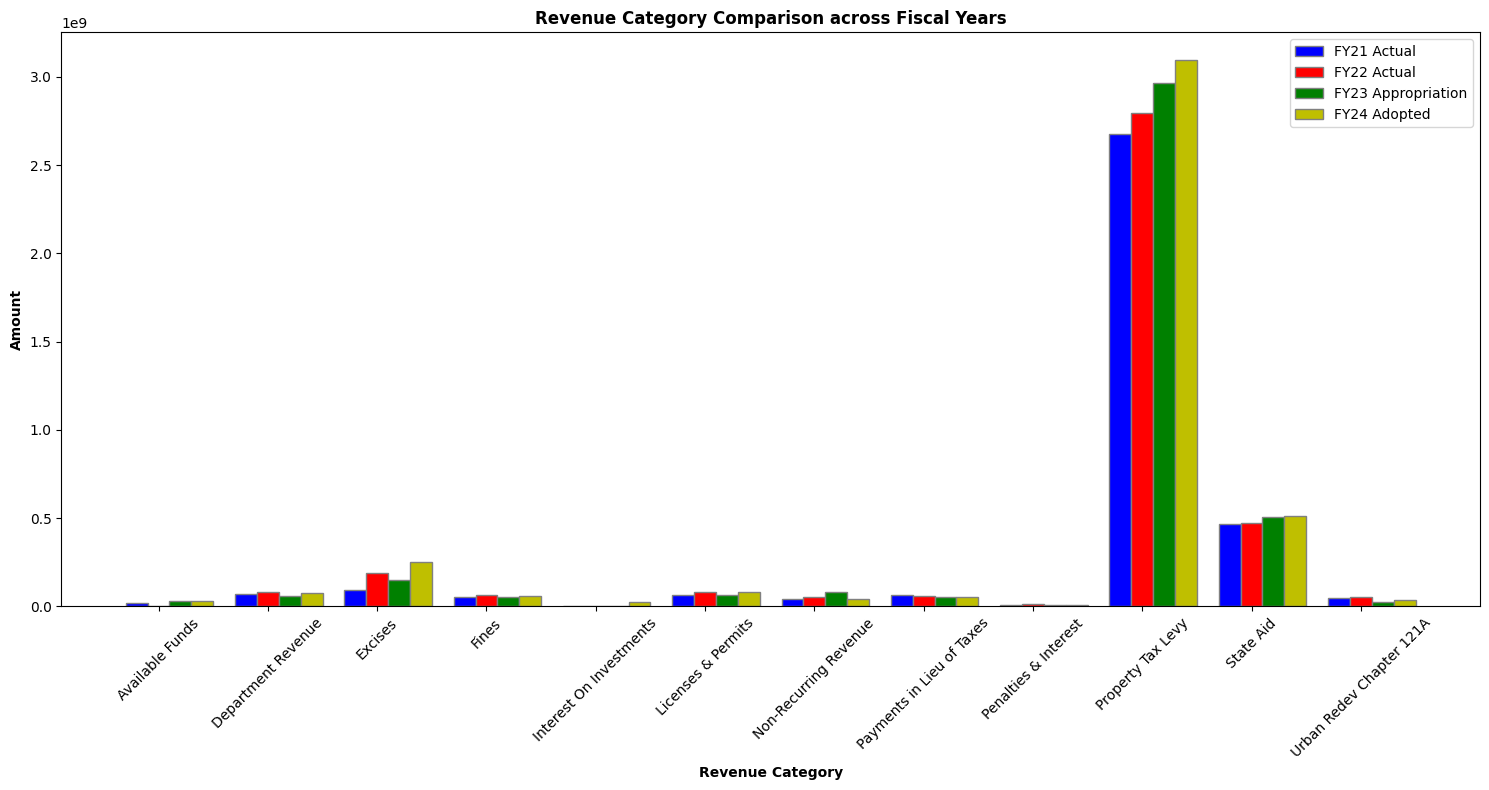

In [20]:
# Group the data by 'Revenue Category' and sum up the values for each fiscal year
grouped_dset = dset.groupby('Revenue Category').agg({
    'FY21 Actual': 'sum',
    'FY22 Actual': 'sum',
    'FY23 Appropriation': 'sum',
    'FY24 Adopted': 'sum'
}).reset_index()

# Plotting
barWidth = 0.2
r1 = range(len(grouped_dset))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(15, 8))
plt.bar(r1, grouped_dset['FY21 Actual'], color='b', width=barWidth, edgecolor='grey', label='FY21 Actual')
plt.bar(r2, grouped_dset['FY22 Actual'], color='r', width=barWidth, edgecolor='grey', label='FY22 Actual')
plt.bar(r3, grouped_dset['FY23 Appropriation'], color='g', width=barWidth, edgecolor='grey', label='FY23 Appropriation')
plt.bar(r4, grouped_dset['FY24 Adopted'], color='y', width=barWidth, edgecolor='grey', label='FY24 Adopted')

# Title & Subtitle
plt.title('Revenue Category Comparison across Fiscal Years', fontweight='bold')
plt.xlabel('Revenue Category', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(grouped_dset))], grouped_dset['Revenue Category'], rotation=45)
plt.ylabel('Amount', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()

The "Property Tax Levy" stands out significantly, indicating its dominant role in revenue generation. Notably, FY24 sees a considerable increase in budget adoption across several categories. 

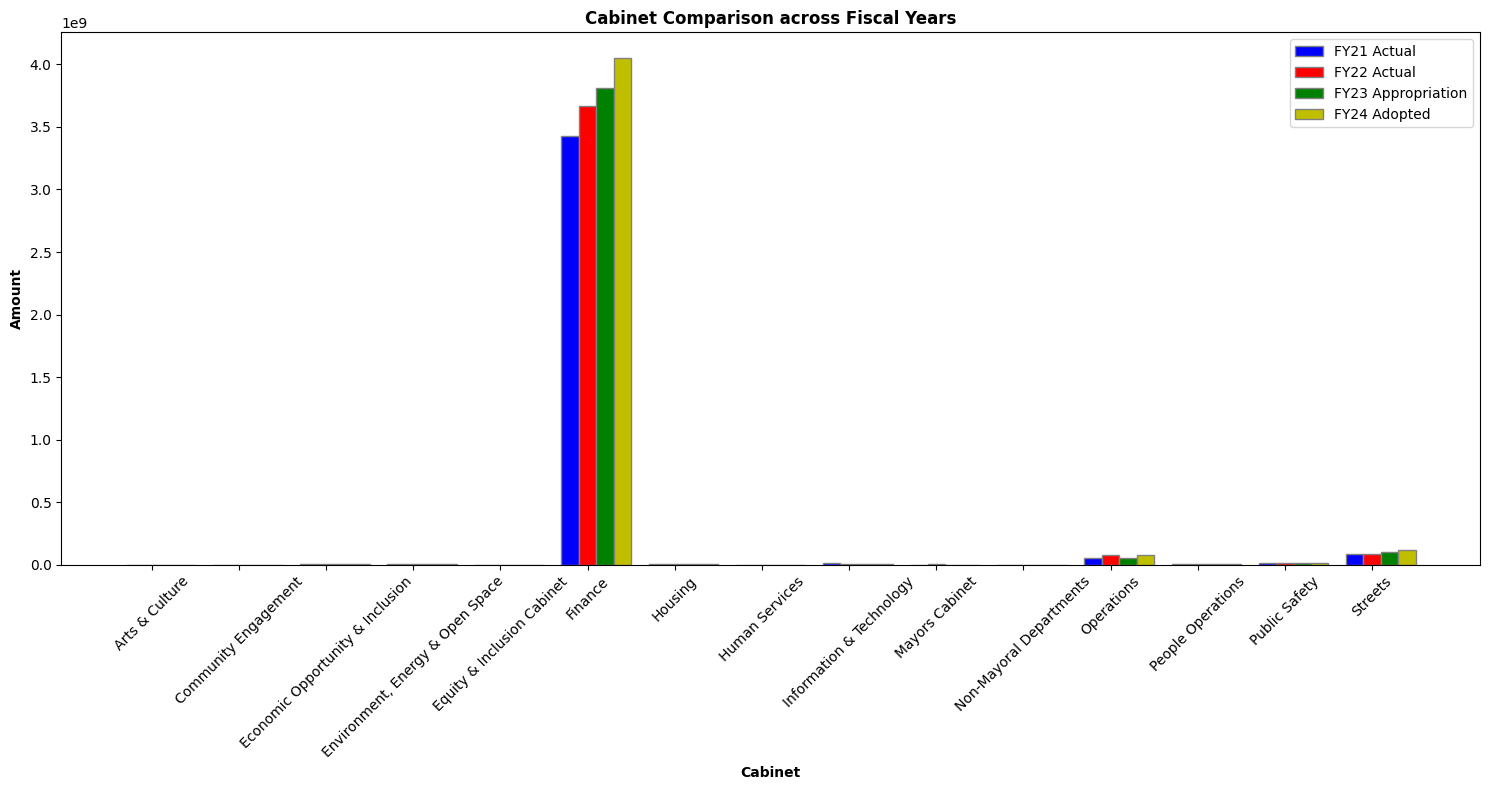

In [23]:
# Group the data by 'Cabinet' and sum up the values for each fiscal year
grouped_dset = dset.groupby('Cabinet').agg({
    'FY21 Actual': 'sum',
    'FY22 Actual': 'sum',
    'FY23 Appropriation': 'sum',
    'FY24 Adopted': 'sum'
}).reset_index()

# Plotting
barWidth = 0.2
r1 = range(len(grouped_dset))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(15, 8))
plt.bar(r1, grouped_dset['FY21 Actual'], color='b', width=barWidth, edgecolor='grey', label='FY21 Actual')
plt.bar(r2, grouped_dset['FY22 Actual'], color='r', width=barWidth, edgecolor='grey', label='FY22 Actual')
plt.bar(r3, grouped_dset['FY23 Appropriation'], color='g', width=barWidth, edgecolor='grey', label='FY23 Appropriation')
plt.bar(r4, grouped_dset['FY24 Adopted'], color='y', width=barWidth, edgecolor='grey', label='FY24 Adopted')

# Title & Subtitle
plt.title('Cabinet Comparison across Fiscal Years', fontweight='bold')
plt.xlabel('Cabinet', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(grouped_dset))], grouped_dset['Cabinet'], rotation=45)
plt.ylabel('Amount', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()

Notably, the "Finance" cabinet significantly dominates in terms of revenue across all years, overshadowing other cabinets. The majority of cabinets have considerably smaller revenue figures, suggesting a high concentration of funds within the "Finance" domain. 